# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [201]:
import pandas as pd
import seaborn as sns

In [202]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [203]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### What is the distribution of the outcome? 

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

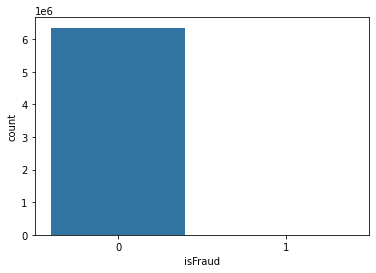

In [205]:
sns.countplot(df["isFraud"])

In [206]:
df["isFraud"].value_counts(normalize=True)*100 #we can see that it is totally unbalanced

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [207]:
# I don't really understand what the step variables tells us to be honest, so it's difficult  for me to decide if it shuld be an integer or not 

In [208]:
len(df[df.nameDest.str.startswith("M")])/df.shape[0] 
#we don't have information on the customers that start with M, they represent a 33% of the dataset, still the dataset is so unbañanced that maybe we shoudl just delete the rows reagrding them 

0.3381460781879163

In [209]:
df[df.isFraud == 1]["nameDest"].str.startswith("M").value_counts() #also as we can see they all have the same category

False    8213
Name: nameDest, dtype: int64

In [210]:
df2 = df.drop(df[df.nameDest.str.startswith("M")].index)

In [211]:
df2["isFraud"].value_counts(normalize=True)*100 #still unbalanced

0    99.804969
1     0.195031
Name: isFraud, dtype: float64

In [212]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


In [213]:
df2.isnull().sum() #There aren't any null values 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [214]:
df2[df2.isFraud == 1]["newbalanceOrig"].value_counts() #most of the fraudulent actions have a newbalanceOrig == 0

0.00           8053
17316255.05       3
10399045.08       3
19585040.37       3
5674547.89        2
               ... 
2626957.79        1
2930418.44        1
25674547.89       1
6580427.81        1
21343002.08       1
Name: newbalanceOrig, Length: 145, dtype: int64

In [215]:
#We analyse de categorical variables: 

In [216]:
df2[df2.isFraud == 1]["type"].value_counts() #only the ones with Cash Out and Transfer are classified as fraudulent, we should keep this variable (onehotencoder)

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [217]:
df2[df2.isFraud == 1]["isFlaggedFraud"].value_counts() #we can delete this column, as most of the fraud cases are not flagged as fraud. 

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

In [218]:
len(df2[df2.isFraud == 1]["nameOrig"].unique())#there are too many unique values, we can drop the column, it doesn't tell us anything 

8213

In [219]:
len(df2[df2.isFraud == 1]["nameDest"].unique())#there are too many unique values, we can drop the column, it doesn't tell us anything 

8169

In [220]:
df2.drop(columns=['nameOrig', 'nameDest',"isFlaggedFraud"], inplace = True)

In [221]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1
9,1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0
10,1,DEBIT,9644.94,4465.0,0.00,10845.0,157982.12,0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.0,51513.44,0


In [222]:
df2 = pd.get_dummies(df2, drop_first=True)

In [223]:
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_TRANSFER
2,1,181.00,181.0,0.00,0.0,0.00,1,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.00,1,1,0,0
9,1,5337.77,41720.0,36382.23,41898.0,40348.79,0,0,1,0
10,1,9644.94,4465.0,0.00,10845.0,157982.12,0,0,1,0
15,1,229133.94,15325.0,0.00,5083.0,51513.44,0,1,0,0


In [224]:
#Now we fix the problem with "balance": As the dataset is too big already, we use Undersample. 

In [225]:
from imblearn.under_sampling import RandomUnderSampler 

In [226]:
X =df2.drop(columns=["isFraud"])

In [227]:
y = df2["isFraud"]

In [228]:
under_sampler = RandomUnderSampler()

In [229]:
X_res, y_res = under_sampler.fit_resample(X, y)

In [230]:
y_res.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: isFraud, dtype: float64

### Run a logisitc regression classifier and evaluate its accuracy.

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [232]:
#First we do it with the original dataset (before being resampled)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
lr = LogisticRegression()

In [235]:
lr.fit(X_train, y_train)

LogisticRegression()

In [236]:
y_pred = lr.predict(X_test)

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    840560
           1       0.47      0.43      0.45      1665

    accuracy                           1.00    842225
   macro avg       0.73      0.71      0.72    842225
weighted avg       1.00      1.00      1.00    842225



In [238]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [239]:
lr.fit(X_res_train, y_res_train)

LogisticRegression()

In [240]:
y_pred = lr.predict(X_res_test)

In [241]:
print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1649
           1       0.92      0.97      0.95      1637

    accuracy                           0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286



### Now pick a model of your choice and evaluate its accuracy.

In [242]:
# I tried first to use XgBoost but it took too long to run, so I stopped it. I will try to use the RandomForestClassifier (Which has taken too long too). 

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
clf = RandomForestClassifier(max_depth = 2) # I had to use a max_depth of 2 because otherwise it took too much time

In [250]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [251]:
y_pred = clf.predict(X_test)

In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    840560
           1       1.00      0.04      0.08      1665

    accuracy                           1.00    842225
   macro avg       1.00      0.52      0.54    842225
weighted avg       1.00      1.00      1.00    842225



In [253]:
clf.fit(X_res_train, y_res_train)

RandomForestClassifier(max_depth=2)

In [254]:
y_pred = clf.predict(X_res_test)

In [255]:
print(classification_report(y_res_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1649
           1       0.96      0.87      0.91      1637

    accuracy                           0.92      3286
   macro avg       0.92      0.92      0.92      3286
weighted avg       0.92      0.92      0.92      3286



### Which model worked better and how do you know?

In [256]:
#The LogisticRegression model worked better